
# Tutorial 4 - Calculating Significance by Monte Carlo

In the homework you should have found the correlation coefficients for some data.  
The Pearson Correlation Coefficient is
\begin{align}
r_{xy} = \frac{1}{N}\frac{ \sum_i (x_i - \bar{x} ) (y_i - \bar{y}) }{ \sqrt{ S^2_x S^2_y} }
\end{align}
where
\begin{align}
\bar{x} = \frac{1}{N}\sum_i x_i ~~~~ S^2_x = \frac{1}{(N-1)} \sum_i ( x_i - \bar{x} )
\end{align}

A non-zero $r_{xy}$ should indicate that there is a correlation between $x$ and $y$.
$r_{xy}$ is an estimator of the populations true correlation coefficient
\begin{align}
\rho_{xy} = \frac{C_{XY}}{\sqrt{\sigma^2_x \sigma_y^2} }
\end{align}

But $r_{xy}$ is a function of random variables so we would not expect it to be exactly 0 
even if there were no correlations.  We could try to calculate the probability distribution of 
$r_{xy}$ analytically, but this might be difficult (more on this in lecture).

##  Monte Carlo

Instead lets find the significance of your measured $r_{xy}$ by Monte Carlo given the hypothesis that 
$x$ and $y$ are not correlated.


1. Create two vectors (X and Y) of random normally distributed numbers with variance 1 and mean zero.  Each vector should be 1000 elements long as was the data in the homework.  Calculate $r_{xy}$ for these.  X and Y 
are uncorrelated since they where generated independently.

2. Repeat step 1 a thousand times to get a distribution of $r_{xy}$.  You should to this in a loop.  There is no reason to save all the X's and Y's.

3. Plot a histogram of your  $r_{xy}$ values.  Does it look Gaussian?

4. What is the fraction of times $|r_{xy}|$ is larger than 0.025, 0.05, 0.08?  Would you expect to get this value if there were no correlation? Calculate the rxy for the homework set homework_01_2d-datafile.csv?  Would you expect to get this value if there were no correlation?

5. Do the exercise above over but this time use the measured $S^2_x$, $S^2_y$, $\bar{x}$ and $\bar{y}$ from homework\_01\_2d-datafile.csv  to generate the  X and Y variables.   Plot the new histogram of $r_{xy}$ over the old one.   Is there a difference or is the distribution of $r_{xy}$ independent of the averages and variances of the distributions?

6. Order your sample of $r_{xy}$'s from smallest to largest.  Take the $i$th value to be an estimate of the $r_{xy}$ where $(N-i)/N$ of the probability distribution is larger than it.  For example the 95\% upper bound would be at $i/N = 0.95$.  What is the 95\% upper bound on $r_{xy}$ if there is no correlation between $X$ and $Y$?  We will call this $r_{0.95}$.
In lecture we will find that the variance in this estimator is
\begin{align}
Var[r_p] = \frac{2 p (1-p) }{N f(r_p)^2 }
\end{align}
for large $N$ where $f(r)$ is the pdf of $r_{xy}$. 
Assuming that $r_{xy}$ is Gaussian distributed and its variance is the one you measure, what is the variance in your estimate of $r_{0.95}$?

7. Extra Credit: If you have time, do 1 through 3 for the Spearman and/or Kendall correlation coefficients.  There are Python functions for calculating them efficiently.  These are "rank statistics" that do not rely on any  assumption about the distribution of $X$ and $Y$ (in this case Gaussian) and are thus more widely applicable.  Do they indicate that the data in the home work is correlated?


In [144]:
#Tutorial # 04
## Calculating Significance by Monte Carlo
##
## More complete directions for this tutorial are in tut4.pdf
##

#1) Calculate two vectors (X and Y) of random normally distributed numbers 
#   with variance 1 and mean zero.  Each vector should be 1000 elements long 
#   as was the data in the homework.  Calculate $r_{xy}$ for these.

import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
import pandas as pd
import csv


x = np.random.normal(0,1,1000)
y = np.random.normal(0,1,1000)

r_xy, p_xy = sp.stats.pearsonr(x,y)
print('CHECK!', r_xy)


CHECK! -0.02546250138201759


In [145]:
#2) Repeat step 1 a thousand times to get a distribution of $r_{xy}$ for a sample 
#   size equal to that of the homework.
n=1000

X = np.random.normal(0,1,size=(n,n))
Y = np.random.normal(0,1,size=(n,n))

nr_xy = np.array([sp.stats.pearsonr(X[i],Y[i]) for i in range(n)])
    
print('CHECK!', nr_xy)

CHECK! [[-0.00814967  0.79687217]
 [-0.05203325  0.1000746 ]
 [ 0.02776864  0.38038217]
 ...
 [-0.00185724  0.95322488]
 [-0.01937434  0.54056311]
 [ 0.00616273  0.84567413]]


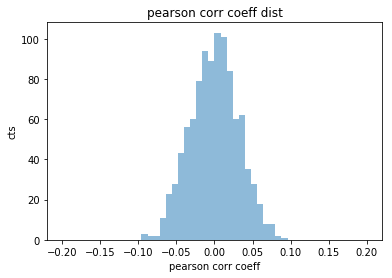

In [146]:
#3) Plot a histogram of your  $r_{xy}$ values.

_ = plt.hist(nr_xy[:,[0]], range=[-0.2,0.2], bins=50, alpha=0.5)
_ = plt.title('pearson corr coeff dist')
_ = plt.xlabel('pearson corr coeff')
_ = plt.ylabel('cts')

plt.show()

In [147]:
#4) What is the fraction of times $|r_{xy}|$ is larger than your measured value 
#   for homework\_01\_2d-datafile.csv ?  Would you expect to find this if there 
#   were no correlation?

data2D = pd.read_csv('homework_01_2d-datafile.csv', ',', header=0)
data2D = data2D.iloc[:,1:]
#print('CHECK!', data2D)
    
xh = data2D.loc[:,'X']
yh = data2D.loc[:,'Y']

#print('CHECK!', xh, '---------------------------------------------', yh)

rh_xy = sp.stats.pearsonr(xh,yh)
print('CHECK!', rh_xy[0])


fmore = np.sum(np.absolute(nr_xy[:,[0]]) > rh_xy[0])/n
fless = np.sum(np.absolute(nr_xy[:,[0]]) < rh_xy[0])/n


print('fraction of higher pearson corr coeff wrt data: ', fmore, '\nfraction of lower:', fless)

perc = [0.025, 0.05, 0.08]
fperc = [0,0,0]

fperc = np.array([np.sum(np.absolute(nr_xy[:,[0]]) < perc[i])/n for i in range(3)])

print('fraztion larger than 0.025 = ', fperc[0], ' \nfraction larger than 0.05 = ', fperc[1],
     '\nfraction larger than 0.08 = ', fperc[2])



CHECK 0.9494460267240372
fraction of higher pearson corr coeff wrt data:  0.0 
fraction of lower: 1.0
fraztion larger than 0.025 =  0.57  
fraction larger than 0.05 =  0.884 
fraction larger than 0.08 =  0.992


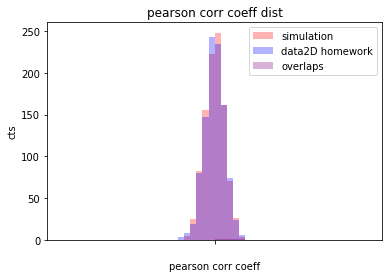

In [148]:
#5) Do the exersize over but this time use the measured $S^2_x$, $S^2_y$, $\bar{x}$ 
#   and $\bar{y}$ from homework\_01\_2d-datafile.csv  to generate the  X and Y 
#   variables.  Does this make any difference?


XH = np.random.normal(xh.mean(),np.sqrt(np.var(xh)),size=(len(xh),len(xh)))
YH = np.random.normal(yh.mean(),np.sqrt(np.var(yh)),size=(len(yh),len(yh)))

rh_xy = np.array([sp.stats.pearsonr(XH[i],YH[i]) for i in range(n)])

#print('CHECK!', rh_xy[0], '\n --------- \n', nr_xy[:,[0]])

_ = plt.hist(nr_xy[:,[0]], range=[-0.5,0.5], bins=50, alpha=0.3, color='red', label='simulation')
_ = plt.hist(rh_xy[:,[0]], range=[-0.5,0.5], bins=50, alpha=0.3, color='blue', label='data2D homework')
_ = plt.hist(' ', color='purple', alpha=0.3, label="overlaps")
_ = plt.title('pearson corr coeff dist')
_ = plt.xlabel('pearson corr coeff')
_ = plt.ylabel('cts')
_ = plt.legend(loc=0)

plt.show()



In [149]:
#6) Order your sample of $r_{xy}$'s from smallest to largest.  Take the $i$th 
#   value to be an estimate of the $r_{xy}$ where $(N-i)/N$ of the probability 
#   distribution is larger than it.  For example the 95\% upper bound would be 
#   at i/N = 0.95.  What is the 95% upper bound on $r_{xy}$ if there is not 
#   correlation between $X$ and $Y$?  We will call this $r_{0.95}$.
#   In lecture we will find that the variance in this estimator is
#
#   Var[r_p] = \frac{ 2 p (1-p) }{N f(r_p)^2 }
#
#   for large $N$ where $f(r)$ is the pdf of $r_{xy}$. 
#   Assuming that $r_{xy}$ is Gaussian distributed and its variance is the one 
#   you measure, what is the variance in your estimate of $r_{0.95}$?

nr_xy = nr_xy[np.argsort(nr_xy[:,0])]

print('CHECK!', nr_xy)


CHECK! [[-0.09515396  0.00259442]
 [-0.09012965  0.00433916]
 [-0.08962697  0.00456226]
 ...
 [ 0.08242925  0.00911207]
 [ 0.08760711  0.00556708]
 [ 0.09160101  0.00374173]]


spearman -0.0020081060081060084
spearman [[ 0.01371298  0.66492728]
 [-0.06081878  0.05452611]
 [ 0.00439239  0.88966631]
 ...
 [-0.04983309  0.11528689]
 [-0.02177616  0.49155174]
 [ 0.02442354  0.44041699]]


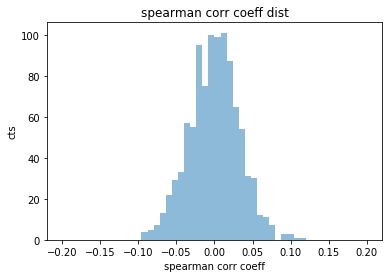

kendall 0.01121121121121121
kendall [[ 0.00318719  0.88004086]
 [ 0.00706707  0.73790064]
 [-0.00348348  0.86898536]
 ...
 [ 0.01951552  0.35544215]
 [ 0.01471071  0.48607123]
 [-0.00870871  0.68006928]]


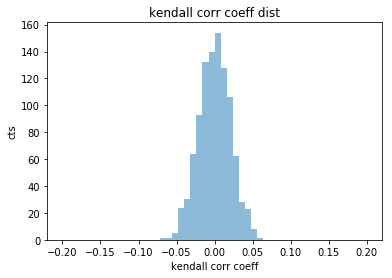

In [150]:
#7) Extra Credit: If you have time, do 1 through 3 for the Spearman and/or Kendall correlation coefficients.  
#   There are Python functions for calculating them efficiently.  
#   These are "rank statistics" that do not rely on any  assumption about the distribution of $X$ and $Y$ 
#   (in this case Gaussian) and are thus more widely applicable.  
#   Do they indicate that the data in the home work is correlated?


x = np.random.normal(0,1,1000)
y = np.random.normal(0,1,1000)

r_xy, p_xy = sp.stats.spearmanr(x,y)
print('spearman', r_xy)


#2) Repeat step 1 a thousand times to get a distribution of $r_{xy}$ for a sample 
#   size equal to that of the homework.

n=1000

X = np.random.normal(0,1,size=(n,n))
Y = np.random.normal(0,1,size=(n,n))

nr_xy = np.array([sp.stats.spearmanr(X[i],Y[i]) for i in range(n)])
    
print('spearman', nr_xy)

#3) Plot a histogram of your  $r_{xy}$ values.


_ = plt.hist(nr_xy[:,[0]], range=[-0.2,0.2], bins=50, alpha=0.5)
_ = plt.title('spearman corr coeff dist')
_ = plt.xlabel('spearman corr coeff')
_ = plt.ylabel('cts')

plt.show()

#########################

x = np.random.normal(0,1,1000)
y = np.random.normal(0,1,1000)

r_xy, p_xy = sp.stats.kendalltau(x,y)
print('kendall', r_xy)

#2) Repeat step 1 a thousand times to get a distribution of $r_{xy}$ for a sample 
#   size equal to that of the homework.

n=1000

X = np.random.normal(0,1,size=(n,n))
Y = np.random.normal(0,1,size=(n,n))

nr_xy = np.array([sp.stats.kendalltau(X[i],Y[i]) for i in range(n)])
    
print('kendall', nr_xy)

#3) Plot a histogram of your  $r_{xy}$ values.

_ = plt.hist(nr_xy[:,[0]], range=[-0.2,0.2], bins=50, alpha=0.5)
_ = plt.title('kendall corr coeff dist')
_ = plt.xlabel('kendall corr coeff')
_ = plt.ylabel('cts')

plt.show()